In [1]:
import warnings
warnings.filterwarnings("ignore") 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from pathlib import Path

2024-07-12 10:01:48.117136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 10:01:48.117338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 10:01:48.316008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Image data generator 
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

In [3]:
train_data = train_gen.flow_from_directory(
"/kaggle/input/faceshape-processed/dataset/train",
target_size = (48, 48),
batch_size = 64,
color_mode = "grayscale",
class_mode="categorical")

test_data = test_gen.flow_from_directory(
"/kaggle/input/faceshape-processed/dataset/test",
target_size = (48, 48),
batch_size = 64,
color_mode = "grayscale",
class_mode="categorical")

Found 3981 images belonging to 5 classes.
Found 998 images belonging to 5 classes.


In [4]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.01), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_model.compile(optimizer="adam", 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

history = cnn_model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=test_data,
    validation_steps=validation_steps,
    shuffle=True
)

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 500ms/step - accuracy: 0.2001 - loss: 4.8309 - val_accuracy: 0.3094 - val_loss: 3.2169
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2500 - loss: 3.2237 - val_accuracy: 0.3421 - val_loss: 3.2016
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 449ms/step - accuracy: 0.3004 - loss: 3.0394 - val_accuracy: 0.3771 - val_loss: 2.5899
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3125 - loss: 2.6817 - val_accuracy: 0.5000 - val_loss: 2.5968
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 448ms/step - accuracy: 0.4164 - loss: 2.4875 - val_accuracy: 0.4625 - val_loss: 2.2173
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 2.2103 - val_accuracy: 0.4737 - val_loss: 2.2940
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 449ms/step - accuracy: 0.4577 - loss: 2.1511 - val_accuracy: 0.4521 - val_loss: 2.0492
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4844 - loss: 1.9938 - val_accuracy: 0.578

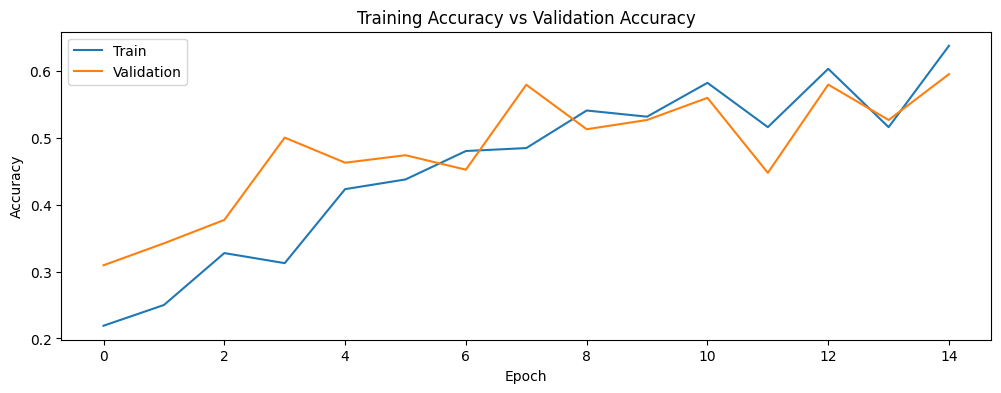

In [5]:
fig , ax = plt.subplots(1, 1)
train_acc = history.history['accuracy']
fig.set_size_inches(12,4)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Training Accuracy vs Validation Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train','Validation'])

In [6]:
# Save the model
cnn_model.save('/kaggle/working/groveOn_model.h5')